# W ~ Y 데이터 분석

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [91]:
import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [12]:
data2017 = pd.read_csv('NHIS_OPEN_GJ_2017_100.csv',encoding='euc-kr')
data2018 = pd.read_csv('NHIS_OPEN_GJ_2018_100.csv')

In [15]:
data2017.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [5]:
data2017.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


In [7]:
data2018.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2018,1,2,7,48,160,60,79.5,1.5,1.5,...,12.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219
1,2018,2,1,6,26,170,55,69.3,1.2,0.8,...,47.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
2,2018,3,1,12,28,165,70,85.0,0.8,0.8,...,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
3,2018,4,2,15,27,150,45,71.5,0.4,0.3,...,13.0,1.0,NaN,1,0.0,NaN,NaN,NaN,0.0,20191219
4,2018,5,2,14,41,145,50,77.0,0.7,0.6,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219


In [8]:
len(data2017)

1000000

In [18]:
len(data2018)

1000000

In [44]:
data2017 = data2017[['(혈청지오티)AST','(혈청지오티)ALT', '감마지티피']]
data2018 = data2018[['(혈청지오티)AST','(혈청지오티)ALT', '감마지티피']]

In [21]:
data2017.head()

,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
0,21.0,35.0,40.0
1,20.0,36.0,27.0
2,47.0,32.0,68.0
3,29.0,34.0,18.0
4,19.0,12.0,25.0


In [22]:
data2018.head()

,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
0,21.0,8.0,12.0
1,35.0,45.0,47.0
2,77.0,47.0,21.0
3,19.0,10.0,13.0
4,26.0,26.0,12.0


## Null값 개수 확인

In [23]:
data2017.isnull().sum()

(혈청지오티)AST    41
(혈청지오티)ALT    42
감마지티피         42
dtype: int64

In [24]:
data2018.isnull().sum()

(혈청지오티)AST    5906
(혈청지오티)ALT    5906
감마지티피         5909
dtype: int64

2017년 데이터에 비해 2018년 데이터가 더 많은 null 값을 가지는 것으로 나타남.

## 각 항목별 최대, 최소, 평균값

### (혈청지오티)AST

In [33]:
print("2017년 (혈청지오티)AST 최댓값 :",data2017['(혈청지오티)AST'].max())
print("2017년 (혈청지오티)AST 최솟값 :",data2017['(혈청지오티)AST'].min())
print("2017년 (혈청지오티)AST 평균값 :",data2017['(혈청지오티)AST'].mean())

2017년 (혈청지오티)AST 최댓값 : 9999.0
2017년 (혈청지오티)AST 최솟값 : 1.0
2017년 (혈청지오티)AST 평균값 : 25.99467078150204


In [29]:
print("2018년 (혈청지오티)AST 최댓값 :",data2018['(혈청지오티)AST'].max())
print("2018년 (혈청지오티)AST 최솟값 :",data2018['(혈청지오티)AST'].min())
print("2018년 (혈청지오티)AST 평균값 :",data2018['(혈청지오티)AST'].mean())

2018년 (혈청지오티)AST 최댓값 : 9999.0
2018년 (혈청지오티)AST 최솟값 : 1.0
2018년 (혈청지오티)AST 평균값 : 26.301625399610096


(혈청지오티)AST 의 정상치는 0~40IU/L 이다. 따라서 평균값은 적당한 값이 나왔음을 알 수 있다.


하지만 최댓값과 9999.0와 같이 평균값과 많은 차이를 가진 것은 매우 비정상적이다. 이와 같은 비정상 수치들을 잘 걸러낼 필요가 있어 보임. (급성 간염에 걸리더라도 2000정도까지만 상승한다고 한다.)

In [80]:
print(data2017[data2017['(혈청지오티)AST'] > 2000], end="\n\n")

print(data2018[data2018['(혈청지오티)AST'] > 2000])

        (혈청지오티)AST  (혈청지오티)ALT  감마지티피
265579      2318.0         NaN   15.0
518025      3742.0      2088.0  378.0
529305      3440.0      3517.0  404.0
541757      9999.0       380.0  419.0
648479      7000.0      3307.0  280.0
666812      3235.0         4.0   74.0
811481      7000.0      3807.0  429.0
888190      2670.0      1522.0  213.0

        (혈청지오티)AST  (혈청지오티)ALT  감마지티피
60027       3854.0      1184.0  377.0
88025       5757.0        52.0  235.0
253089      3382.0      1968.0  510.0
367490      7931.0      5896.0  408.0
500790      2454.0      1163.0  188.0
516382      2820.0      1276.0  211.0
550385      6680.0      3560.0  186.0
605705      9999.0        15.0  232.0
716765      3271.0      1514.0  258.0
718178      5952.0      3832.0  258.0
796653      3085.0      2330.0  730.0
822998      2996.0      3160.0  392.0
893532      3260.0      3150.0  179.0


생각보다 2000을 넘는 수치가 많지 않다... 2017년 2018년 각각 8개, 13개 정도..?

In [115]:
print(data2017[data2017['(혈청지오티)AST'] > 40], end="\n\n")

print(data2018[data2018['(혈청지오티)AST'] > 40])

        (혈청지오티)AST  (혈청지오티)ALT  감마지티피
2             47.0        32.0   68.0
11            48.0        51.0   42.0
18            41.0        51.0   60.0
29            43.0        45.0   12.0
62            41.0        45.0   25.0
...            ...         ...    ...
999914        43.0        73.0   50.0
999927        45.0        95.0   75.0
999939       185.0        68.0  667.0
999959        51.0        55.0   32.0
999982        50.0        63.0   31.0

[73498 rows x 3 columns]

        (혈청지오티)AST  (혈청지오티)ALT  감마지티피
2             77.0        47.0   21.0
6            101.0        26.0  446.0
37            78.0        63.0  386.0
44            52.0        77.0   31.0
57            42.0       119.0   22.0
...            ...         ...    ...
999908        49.0        50.0   86.0
999918        62.0        71.0   91.0
999938        43.0        36.0   20.0
999971        51.0       101.0   80.0
999979        65.0       127.0   64.0

[77226 rows x 3 columns]


정상치 0~40IU/L 의 기준으로 파악해 보았을 때, 정상치보다 높은 수치를 가진 사람은 각각 70000명 정도로 파악된다.

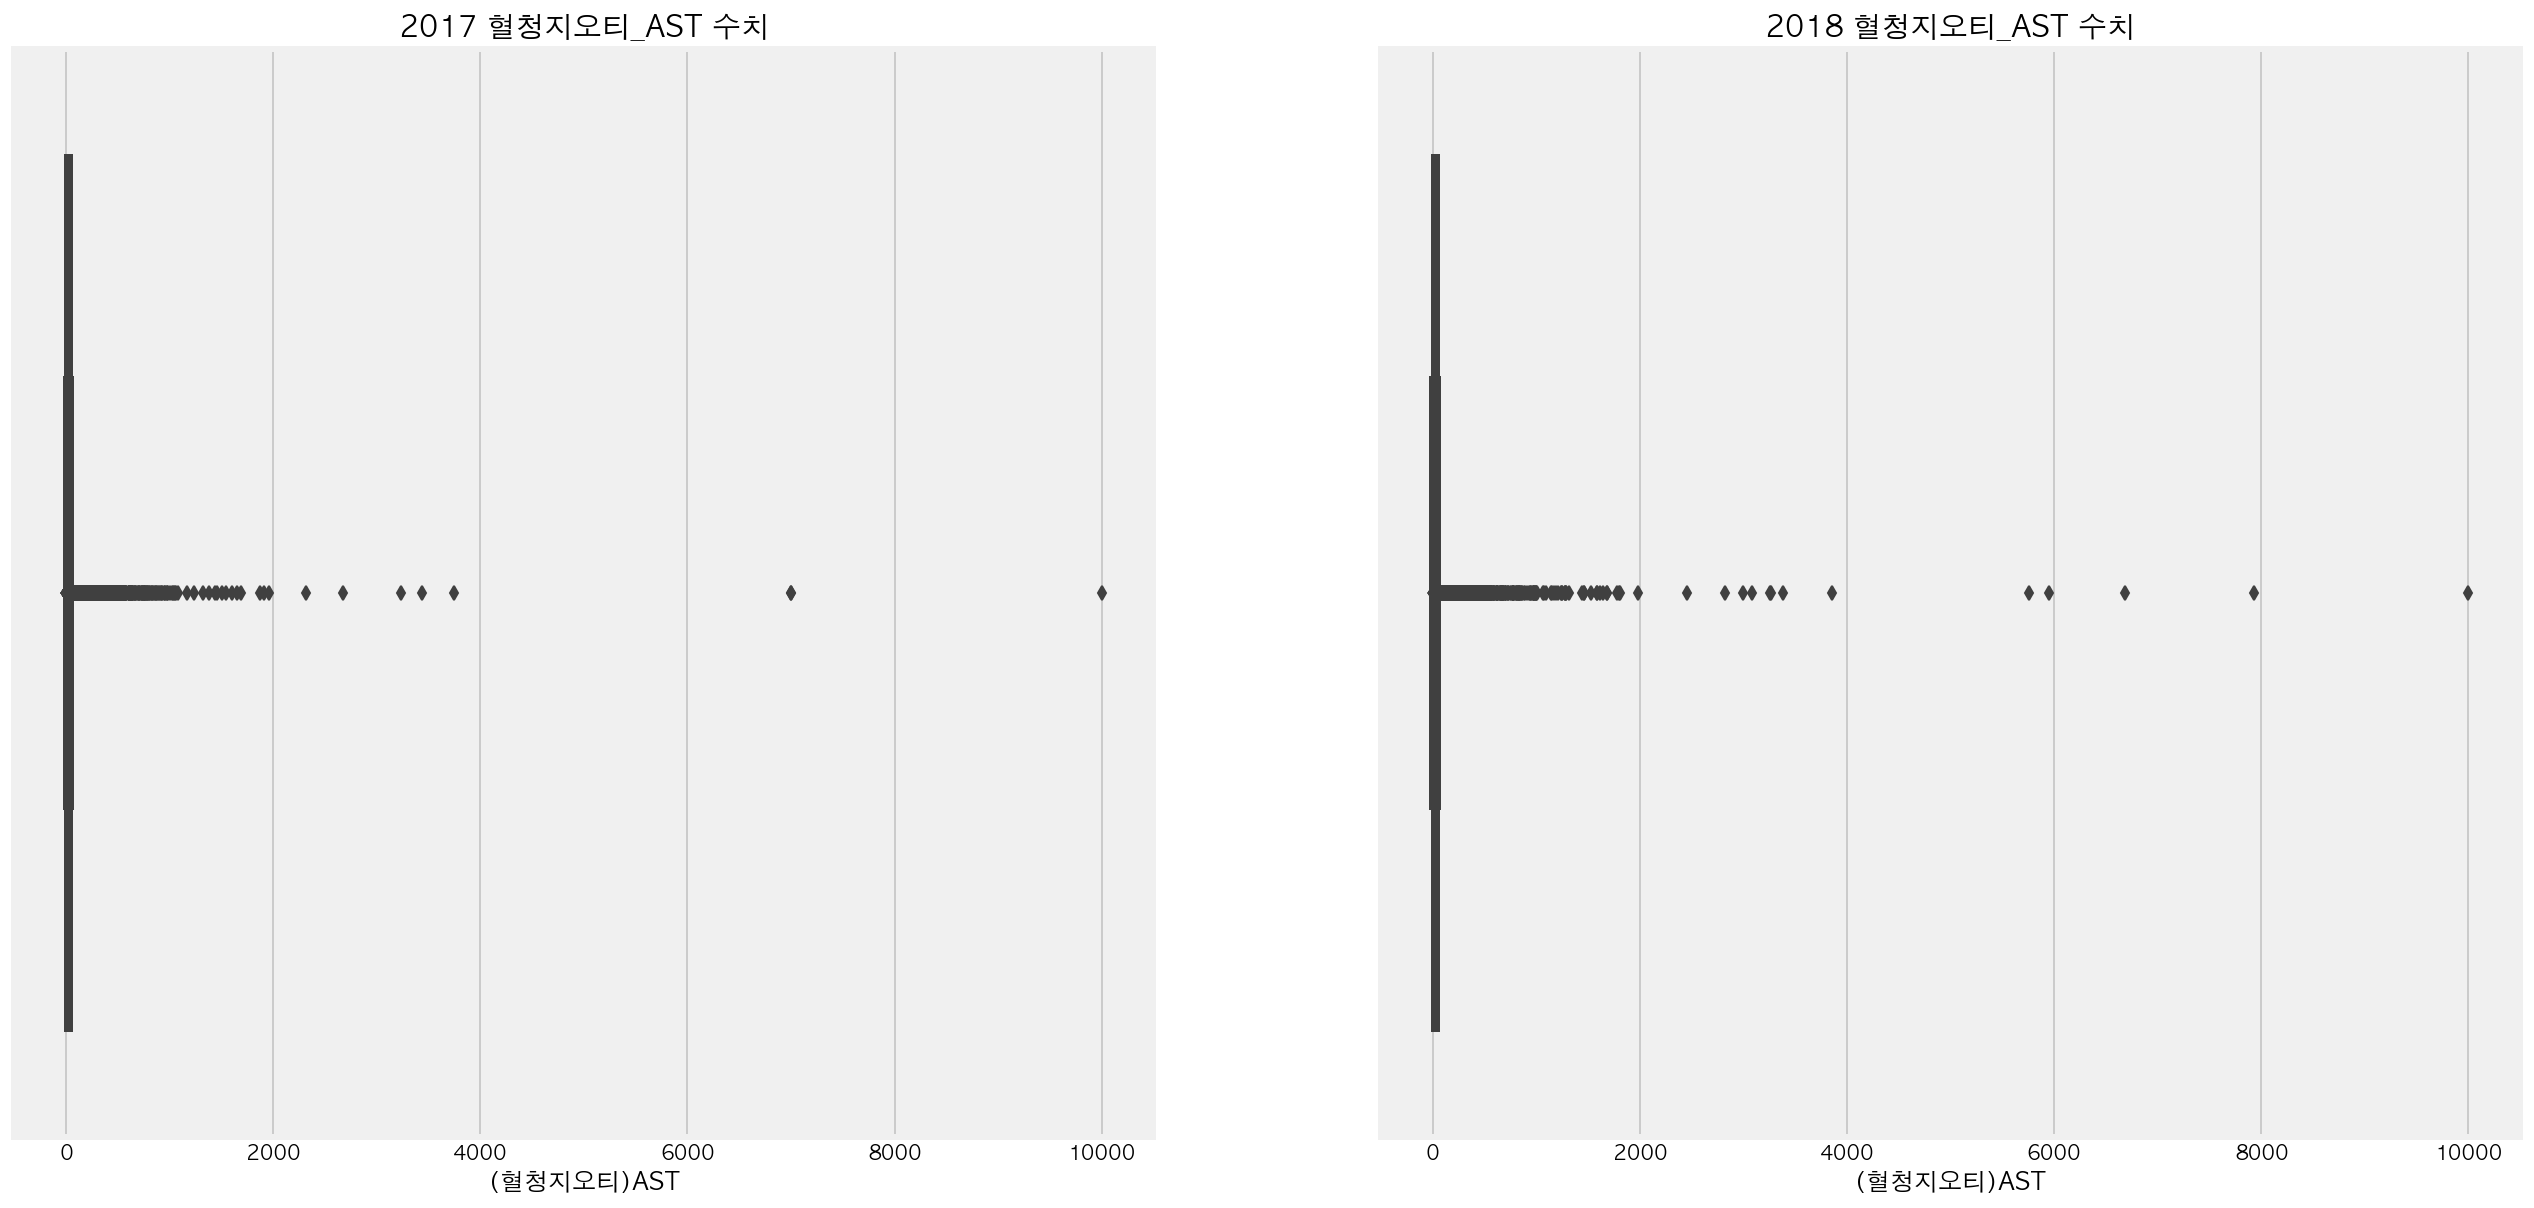

In [92]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.boxplot(x="(혈청지오티)AST", data=data2017, ax=ax[0])
ax[0].set_title('2017 혈청지오티_AST 수치')
sns.boxplot(x="(혈청지오티)AST", data=data2018, ax=ax[1])
ax[1].set_title('2018 혈청지오티_AST 수치')
plt.show()

### (혈청지오티)AST 와 지방간, 당뇨

수치가 정상치보다 2~3배 높으면 지방간을 의심, 지방간을 가진 환자의 30%가 당뇨병 발생 확률을 갖는다.

*일단 정상치보다 3배 높은 120 IU/L 수치로 지방간인지 아닌지 판단해보긴 했음*

In [154]:
print("2017 지방간 인원: " ,len(data2017[data2017['(혈청지오티)AST'] > 120]))
print("2017 당뇨병 발병률", len(data2017[data2017['(혈청지오티)AST'] > 120]) * 0.3 / len(data2017) * 100,"%")
print("2018 지방간 인원: " ,len(data2018[data2018['(혈청지오티)AST'] > 120]))
print("2018 당뇨병 발병률", len(data2018[data2018['(혈청지오티)AST'] > 120]) * 0.3 / len(data2018) * 100,"%")

2017 지방간 인원:  3364
2017 당뇨병 발병률 0.10092000000000001 %
2018 지방간 인원:  3537
2018 당뇨병 발병률 0.10611 %


### (혈청지오티)ALT

In [35]:
print("2017년 (혈청지오티)ALT 최댓값 :",data2017['(혈청지오티)ALT'].max())
print("2017년 (혈청지오티)ALT 최솟값 :",data2017['(혈청지오티)ALT'].min())
print("2017년 (혈청지오티)ALT 평균값 :",data2017['(혈청지오티)ALT'].mean())

2017년 (혈청지오티)ALT 최댓값 : 7210.0
2017년 (혈청지오티)ALT 최솟값 : 1.0
2017년 (혈청지오티)ALT 평균값 : 25.749509479398135


In [36]:
print("2018년 (혈청지오티)ALT 최댓값 :",data2018['(혈청지오티)ALT'].max())
print("2018년 (혈청지오티)ALT 최솟값 :",data2018['(혈청지오티)ALT'].min())
print("2018년 (혈청지오티)ALT 평균값 :",data2018['(혈청지오티)ALT'].mean())

2018년 (혈청지오티)ALT 최댓값 : 5896.0
2018년 (혈청지오티)ALT 최솟값 : 1.0
2018년 (혈청지오티)ALT 평균값 : 26.287882232464938


(혈청지오티)ALT 또한 평균값은 적당하지만 최댓값 수치가 비정상적으로 높다. 

In [81]:
print(data2017[data2017['(혈청지오티)ALT'] > 2000], end="\n\n")

print(data2018[data2018['(혈청지오티)ALT'] > 2000])

        (혈청지오티)AST  (혈청지오티)ALT  감마지티피
26464        924.0      2309.0  169.0
48706       1870.0      2080.0  889.0
323341        21.0      2535.0   35.0
402198        82.0      2030.0  358.0
518025      3742.0      2088.0  378.0
529305      3440.0      3517.0  404.0
614490      1052.0      7210.0  270.0
648479      7000.0      3307.0  280.0
721071      1377.0      2273.0  345.0
728925       860.0      2530.0  290.0
811481      7000.0      3807.0  429.0
815679        43.0      4633.0    9.0
857290        40.0      2981.0   38.0
929832       827.0      2277.0  937.0
937956      1962.0      2698.0  953.0
995323       753.0      2059.0  174.0

        (혈청지오티)AST  (혈청지오티)ALT  감마지티피
306          314.0      2850.0  207.0
69227       1311.0      2062.0  103.0
181523      1244.0      2014.0  185.0
315329      1193.0      2683.0  127.0
334084      1984.0      2004.0  161.0
367490      7931.0      5896.0  408.0
372097      1458.0      2129.0  241.0
550385      6680.0      3560.0  186.0
583762     

(혈청지오티)ALT 수치도 2000을 넘는 수치가 많지 않다. 

In [96]:
print(data2017[data2017['(혈청지오티)ALT'] > 40], end="\n\n")

print(data2018[data2018['(혈청지오티)ALT'] > 40])

        (혈청지오티)AST  (혈청지오티)ALT  감마지티피
11            48.0        51.0   42.0
18            41.0        51.0   60.0
26            39.0        43.0   29.0
29            43.0        45.0   12.0
30            25.0        46.0   53.0
...            ...         ...    ...
999977        30.0        56.0   37.0
999978        17.0        62.0   23.0
999982        50.0        63.0   31.0
999985        36.0        43.0   18.0
999999        24.0        43.0   36.0

[124569 rows x 3 columns]

        (혈청지오티)AST  (혈청지오티)ALT  감마지티피
1             35.0        45.0   47.0
2             77.0        47.0   21.0
13            34.0        81.0   76.0
25            19.0        53.0  149.0
26            35.0        65.0  158.0
...            ...         ...    ...
999959        31.0        63.0   45.0
999971        51.0       101.0   80.0
999977        36.0        44.0   55.0
999979        65.0       127.0   64.0
999989        35.0        59.0   28.0

[130842 rows x 3 columns]


마찬가지로 정상치 0 ~ 40 IU/L 의 기준으로 파악해 보았을 때, 정상치보다 높은 수치를 가진 사람은 각각 120000~130000명 정도로 2017년도 데이터 보다 더 많다.

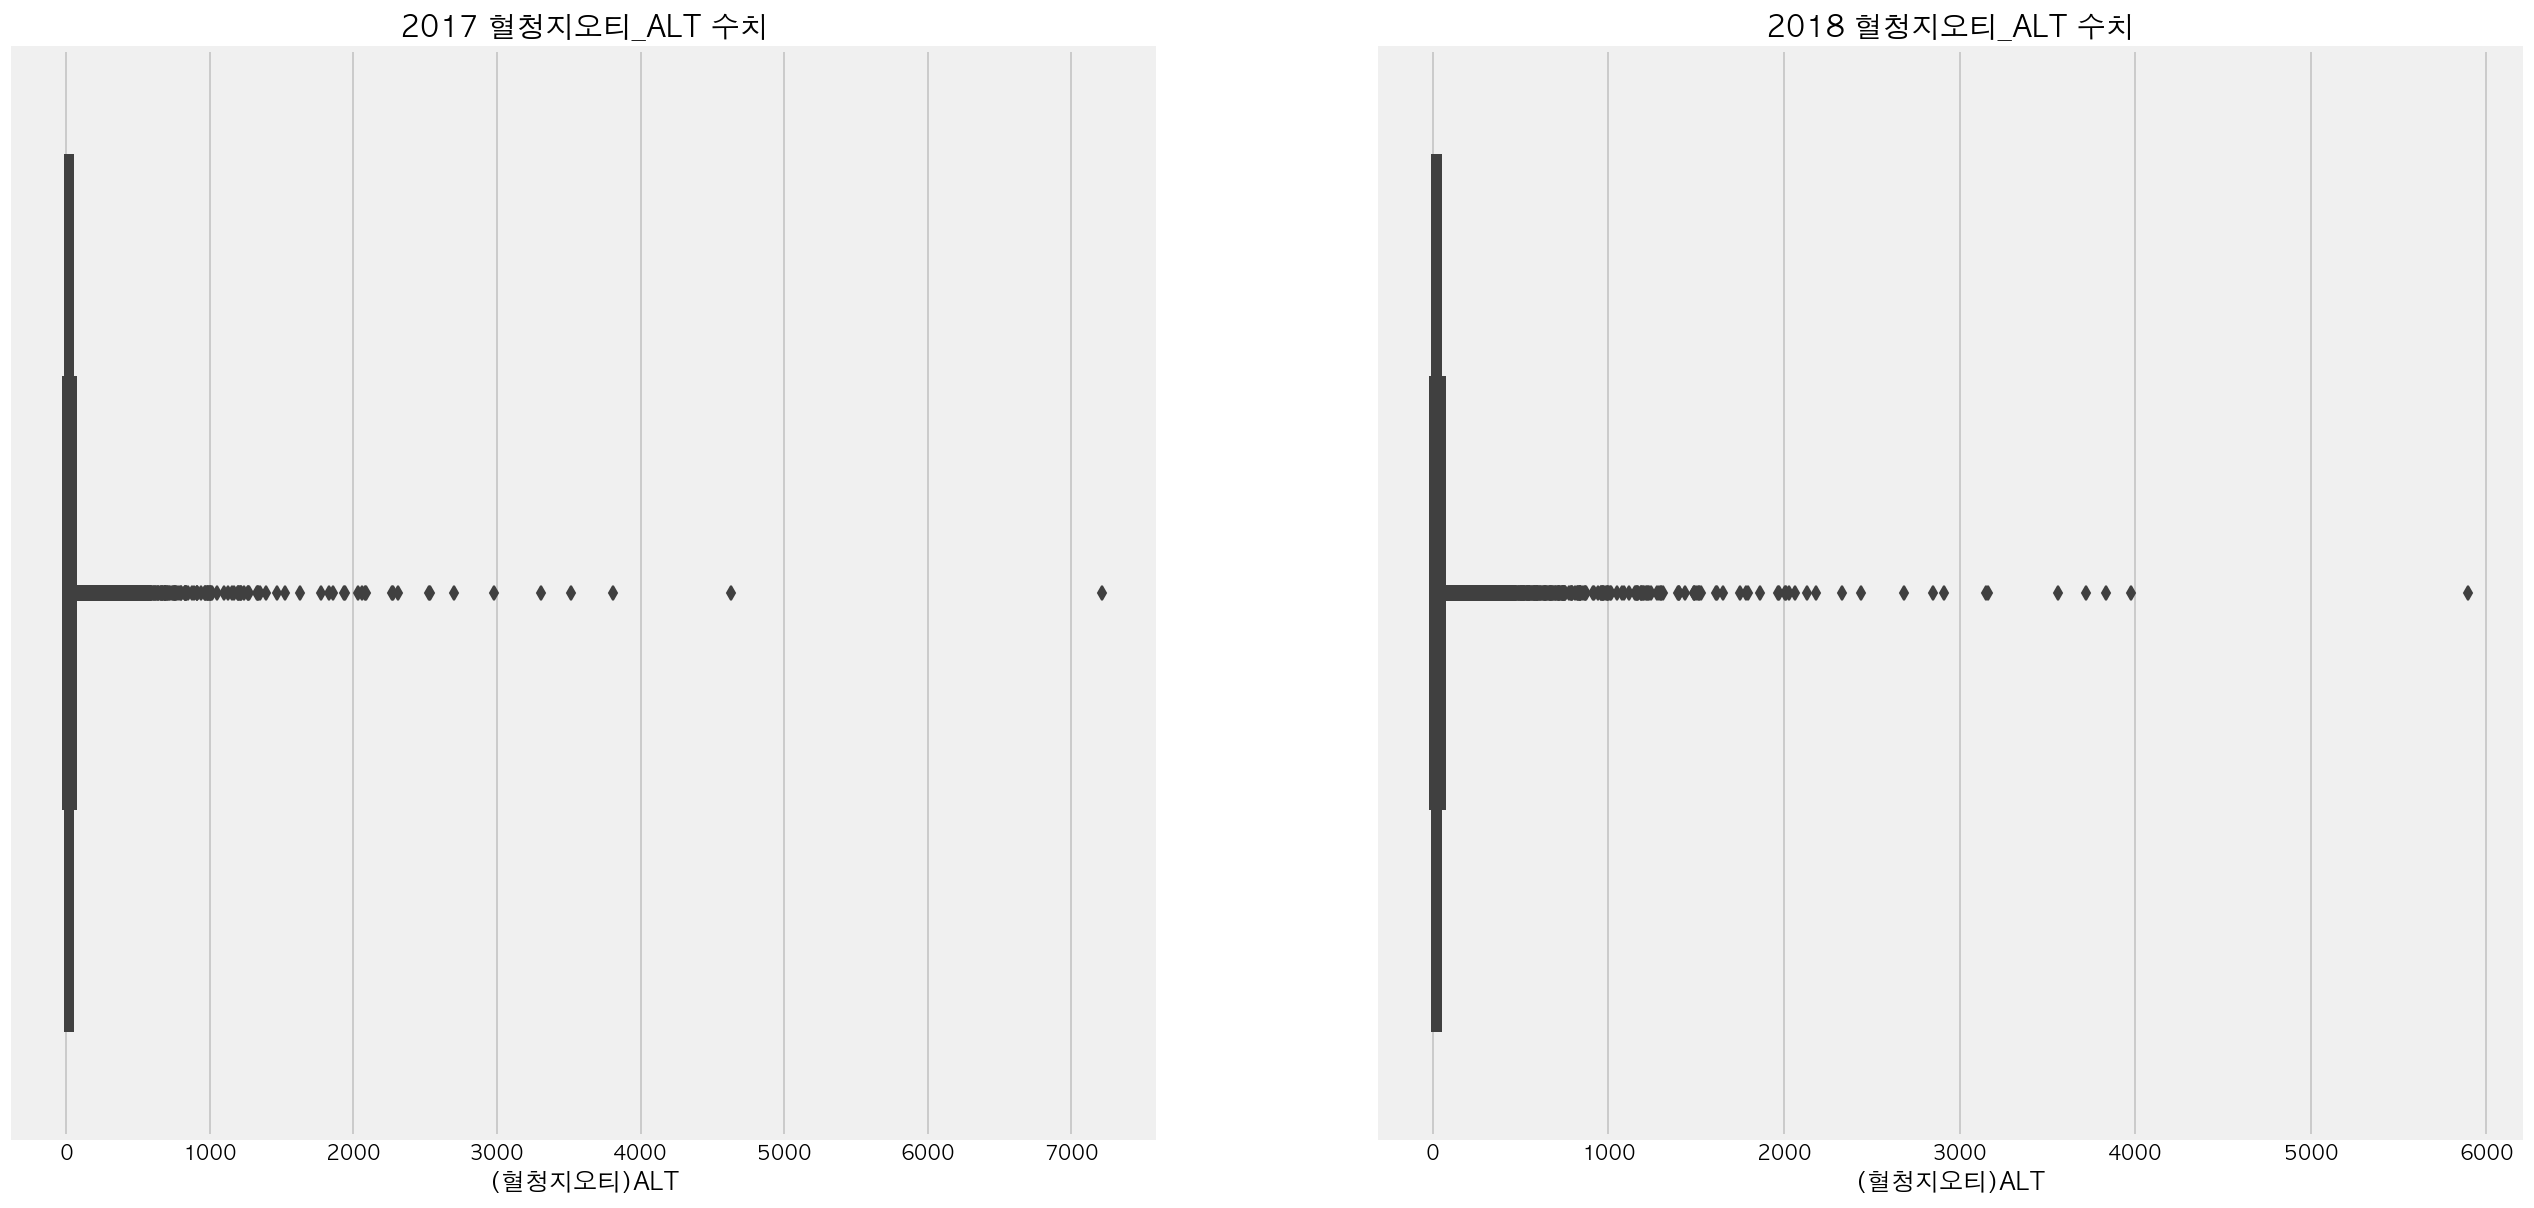

In [93]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.boxplot(x="(혈청지오티)ALT", data=data2017, ax=ax[0])
ax[0].set_title('2017 혈청지오티_ALT 수치')
sns.boxplot(x="(혈청지오티)ALT", data=data2018, ax=ax[1])
ax[1].set_title('2018 혈청지오티_ALT 수치')
plt.show()

### (혈청지오티)ALT 와 지방간, 당뇨

수치가 정상치보다 2~3배 높으면 지방간을 의심, 지방간을 가진 환자의 30%가 당뇨병 발생 확률을 갖는다.

AST와 마찬가지로 120 IU/L 수치로 지방간인지 아닌지 판단

In [155]:
print("2017 지방간 인원: " ,len(data2017[data2017['(혈청지오티)ALT'] > 120]))
print("2017 당뇨병 발병률", len(data2017[data2017['(혈청지오티)ALT'] > 120]) * 0.3 / len(data2017) * 100, "%")
print("2018 지방간 인원: " ,len(data2018[data2018['(혈청지오티)ALT'] > 120]))
print("2018 당뇨병 발병률", len(data2018[data2018['(혈청지오티)ALT'] > 120]) * 0.3 / len(data2018) * 100, "%")

2017 지방간 인원:  6810
2017 당뇨병 발병률 0.2043 %
2018 지방간 인원:  7199
2018 당뇨병 발병률 0.21596999999999997 %


### 감마지티피

In [37]:
print("2017년 감마지티피 최댓값 :",data2017['감마지티피'].max())
print("2017년 감마지티피 최솟값 :",data2017['감마지티피'].min())
print("2017년 감마지티피 평균값 :",data2017['감마지티피'].mean())

2017년 감마지티피 최댓값 : 999.0
2017년 감마지티피 최솟값 : 1.0
2017년 감마지티피 평균값 : 37.184272739455054


In [38]:
print("2018년 감마지티피 최댓값 :",data2018['감마지티피'].max())
print("2018년 감마지티피 최솟값 :",data2018['감마지티피'].min())
print("2018년 감마지티피 평균값 :",data2018['감마지티피'].mean())

2018년 감마지티피 최댓값 : 999.0
2018년 감마지티피 최솟값 : 1.0
2018년 감마지티피 평균값 : 37.607043017188566


감마지티피의 정상치는 남성이 11 ~ 63IU/L, 여성이 8 ~ 35IU/L 이다.

수치가 600 이상일 경우 알코올성 간장애, 황달, 간암 등과 같은 심각한 질병이 발병한다고 한다. 999 정도로 큰 수치는 처리해야할 것 같음.

In [118]:
gtp2017 = pd.read_csv('NHIS_OPEN_GJ_2017_100.csv',encoding='euc-kr')
gtp2017 = gtp2017[['성별코드','(혈청지오티)AST','(혈청지오티)ALT', '감마지티피']]
man2017 = gtp2017[gtp2017['성별코드'] == 1]['감마지티피']
woman2017 = gtp2017[gtp2017['성별코드'] == 2]['감마지티피']

print("감마지티피 2017 남자 통계")
print(man2017.describe(), end="\n\n")

print("감마지티피 2017 여자 통계")
print(woman2017.describe(), end="\n\n")


감마지티피 2017 남자 통계
count    530391.000000
mean         49.445130
std          61.292601
min           1.000000
25%          21.000000
50%          32.000000
75%          54.000000
max         999.000000
Name: 감마지티피, dtype: float64

감마지티피 2017 여자 통계
count    469567.000000
mean         23.335241
std          29.199560
min           1.000000
25%          13.000000
50%          17.000000
75%          24.000000
max         999.000000
Name: 감마지티피, dtype: float64



In [119]:
gtp2018 = pd.read_csv('NHIS_OPEN_GJ_2018_100.csv')
gtp2018 = gtp2018[['성별코드','(혈청지오티)AST','(혈청지오티)ALT', '감마지티피']]

man2018 = gtp2018[gtp2018['성별코드'] == 1]['감마지티피']
woman2018 = gtp2018[gtp2018['성별코드'] == 2]['감마지티피']

print("감마지티피 2018 남자 통계")
print(man2018.describe(), end="\n\n")

print("감마지티피 2018 여자 통계")
print(woman2018.describe(), end="\n\n")



감마지티피 2018 남자 통계
count    533597.000000
mean         49.691372
std          61.235152
min           1.000000
25%          22.000000
50%          32.000000
75%          54.000000
max         999.000000
Name: 감마지티피, dtype: float64

감마지티피 2018 여자 통계
count    460494.000000
mean         23.604338
std          28.606503
min           1.000000
25%          13.000000
50%          17.000000
75%          25.000000
max         999.000000
Name: 감마지티피, dtype: float64



남자, 여자 별 통계를 간단히 살펴보았다. 평균값은 적당하지만 최댓값 수치가 높다.

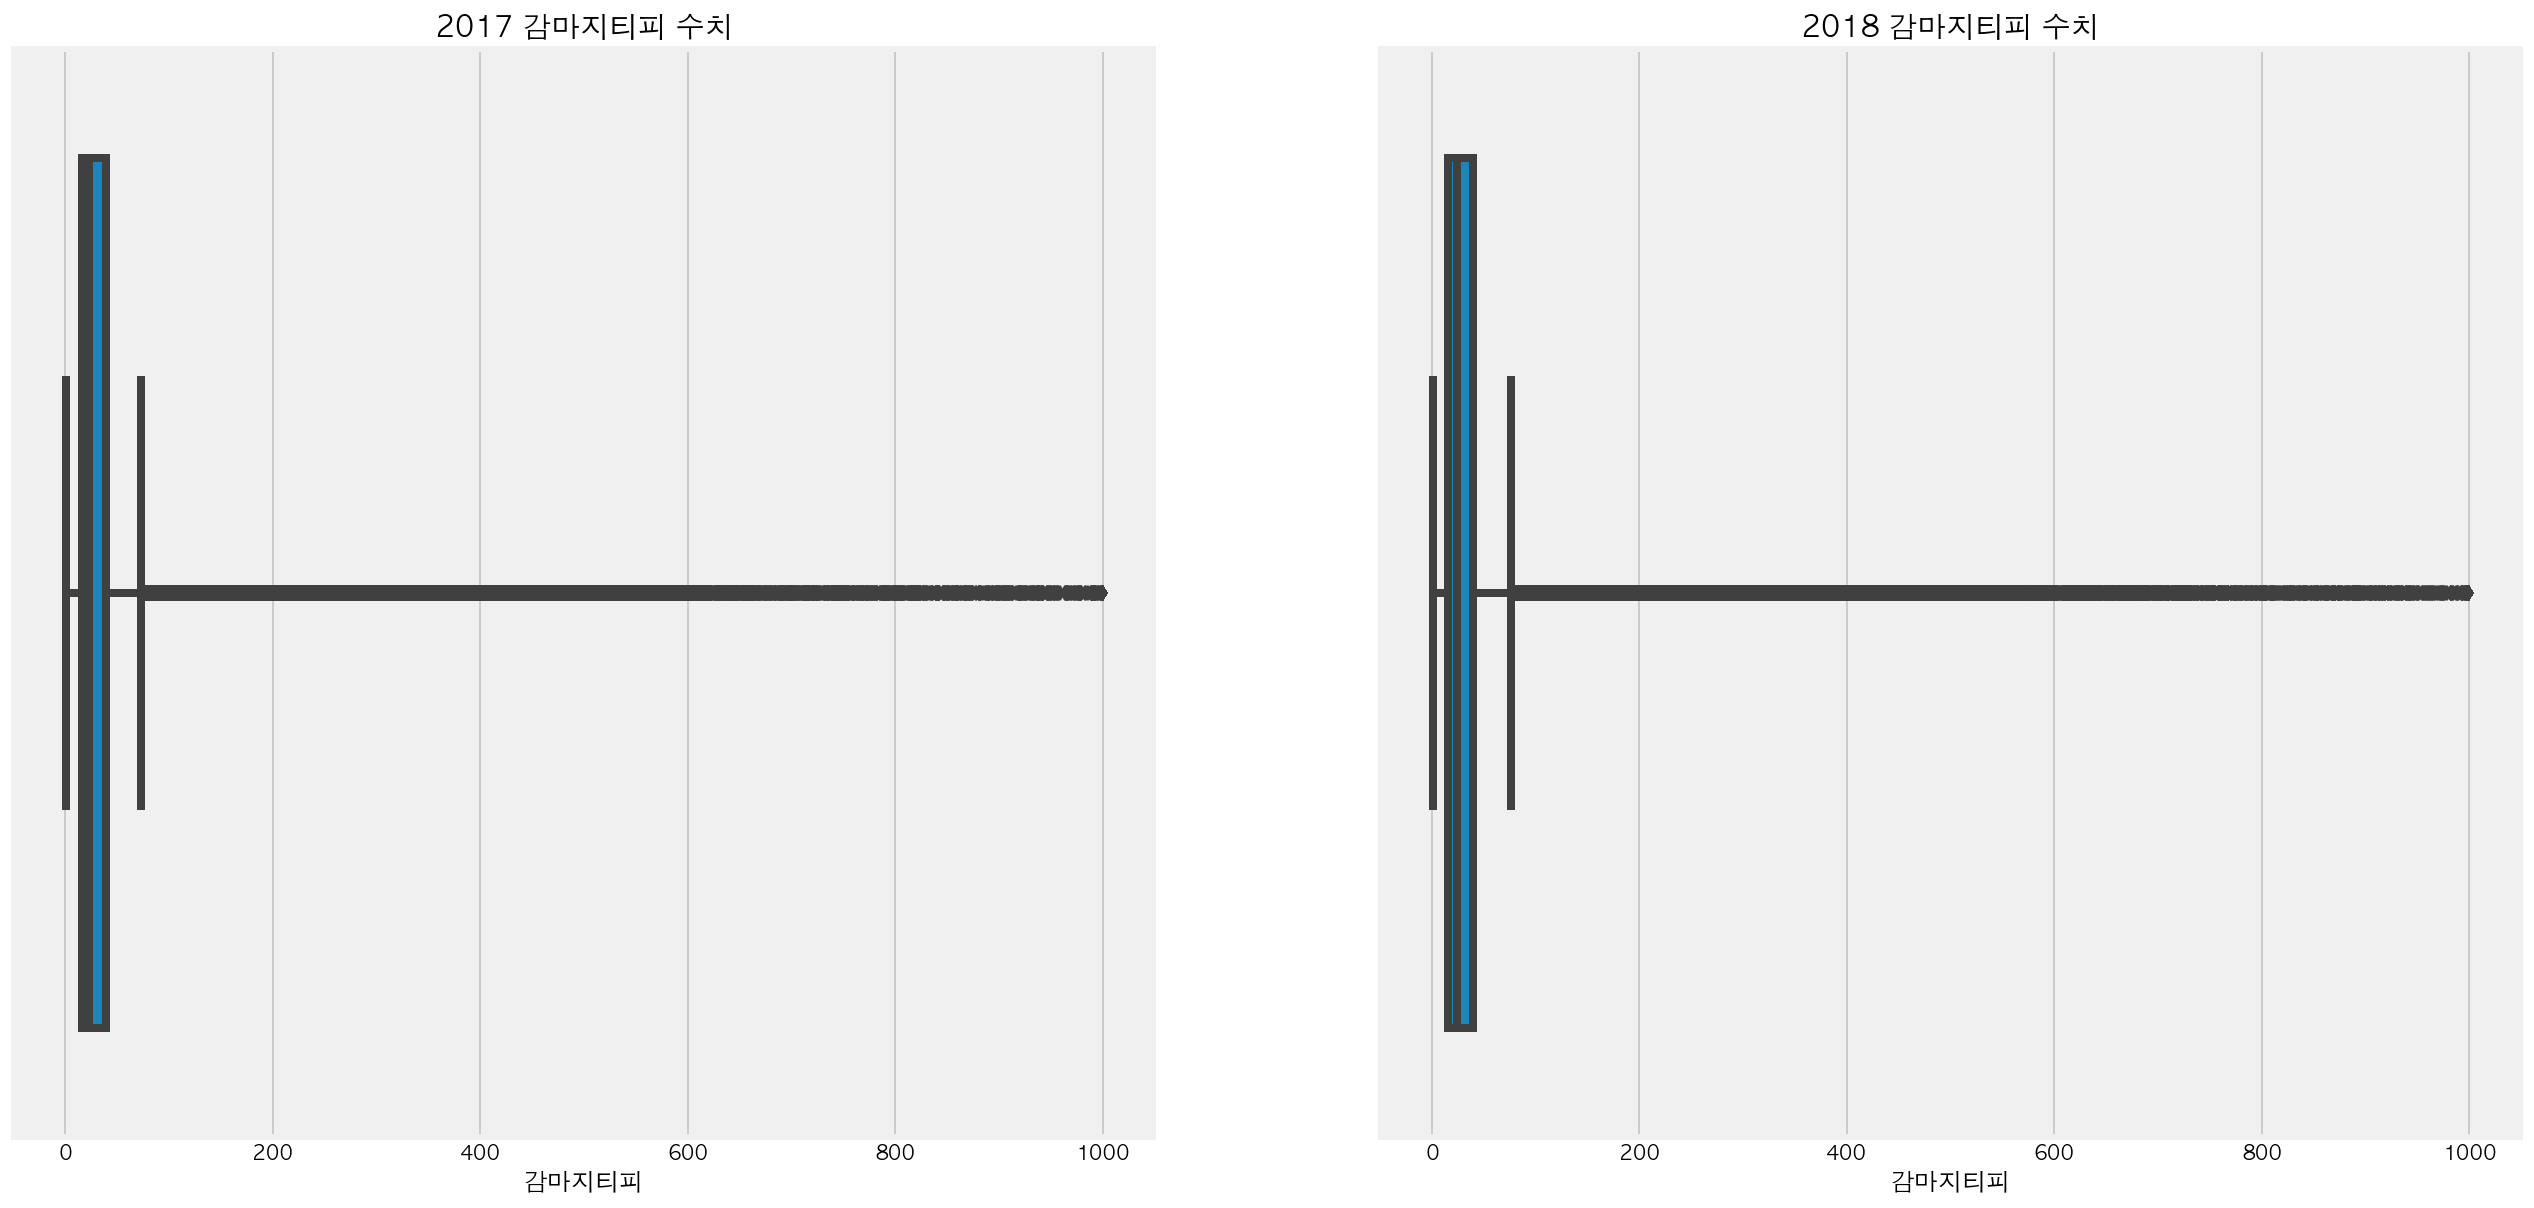

In [94]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.boxplot(x="감마지티피", data=data2017, ax=ax[0])
ax[0].set_title('2017 감마지티피 수치')
sns.boxplot(x="감마지티피", data=data2018, ax=ax[1])
ax[1].set_title('2018 감마지티피 수치')
plt.show()